## Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from windrose import WindroseAxes

## Load dataset


In [3]:
df = pd.read_csv(f'C:/Users/Skyline/solar-challenge-week1/data/sierraleone-bumbuna.csv')

## Summary Statistics & Missing-Value Report

In [4]:
# Summary Statistics
print("Summary Statistics:")
display(df.describe())

# Missing Values
missing = df.isna().sum()
print("\nMissing Values:")
display(missing)
print("\nColumns with >5% Missing:")
display(missing[missing > len(df) * 0.05] / len(df))

Summary Statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN



Missing Values:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


Columns with >5% Missing:


Comments    1.0
dtype: float64

## Outlier Detection & Basic Cleaning

In [5]:
# Compute Z-scores for key columns
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[key_cols], nan_policy='omit'))
outliers = (z_scores > 3).any(axis=1)
print(f"Rows with outliers (|Z|>3): {outliers.sum()}")

# Impute missing values with median for key columns
for col in key_cols:
    df[col] = df[col].fillna(df[col].median())

# Export cleaned DataFrame
df.to_csv(f'data/sierra_leone_clean.csv', index=False)

Rows with outliers (|Z|>3): 16292


## Time Series Analysis

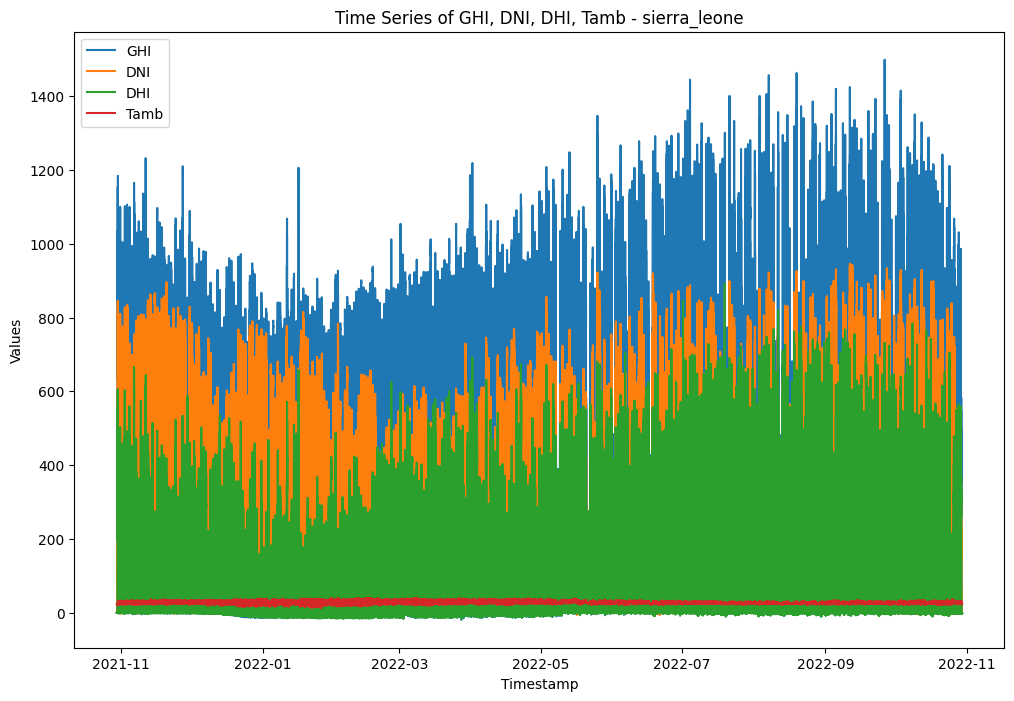

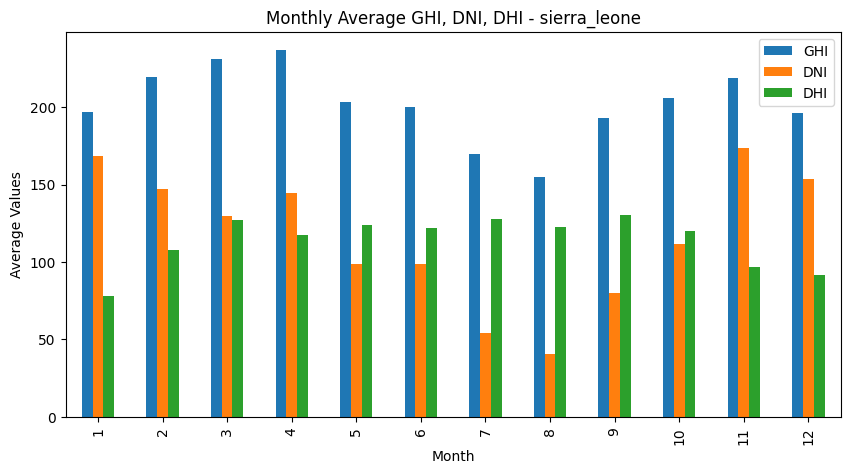

In [6]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot GHI, DNI, DHI, Tamb vs Timestamp
plt.figure(figsize=(12, 8))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title(f'Time Series of GHI, DNI, DHI, Tamb - sierra_leone')
plt.legend()
plt.show()

# Monthly trends
df['Month'] = df['Timestamp'].dt.month
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI']].mean()
monthly_avg.plot(kind='bar', figsize=(10, 5))
plt.title(f'Monthly Average GHI, DNI, DHI - sierra_leone')
plt.xlabel('Month')
plt.ylabel('Average Values')
plt.show()

## Cleaning Impact

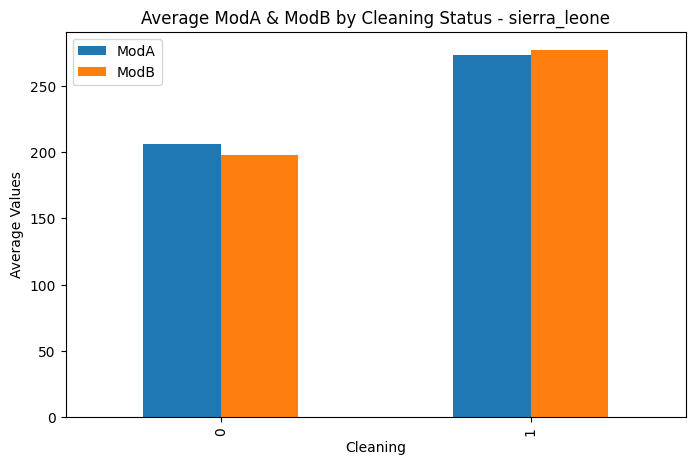

In [7]:
# Group by Cleaning flag and plot ModA, ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
cleaning_impact.plot(kind='bar', figsize=(8, 5))
plt.title(f'Average ModA & ModB by Cleaning Status - sierra_leone')
plt.xlabel('Cleaning')
plt.ylabel('Average Values')
plt.show()

## Correlation & Relationship Analysis

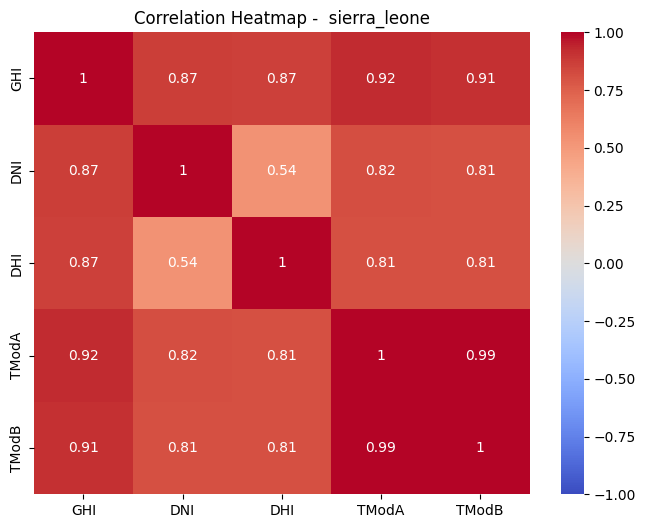

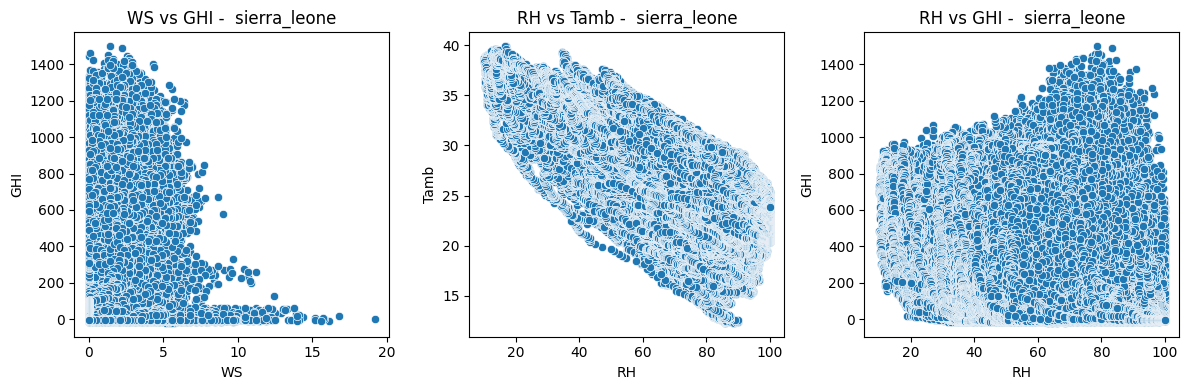

In [8]:
# Correlation heatmap
corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Correlation Heatmap -  sierra_leone')
plt.show()

# Scatter plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title(f'WS vs GHI -  sierra_leone')
plt.subplot(1, 3, 2)
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title(f'RH vs Tamb -  sierra_leone')
plt.subplot(1, 3, 3)
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title(f'RH vs GHI -  sierra_leone')
plt.tight_layout()
plt.show()

## Wind & Distribution Analysis

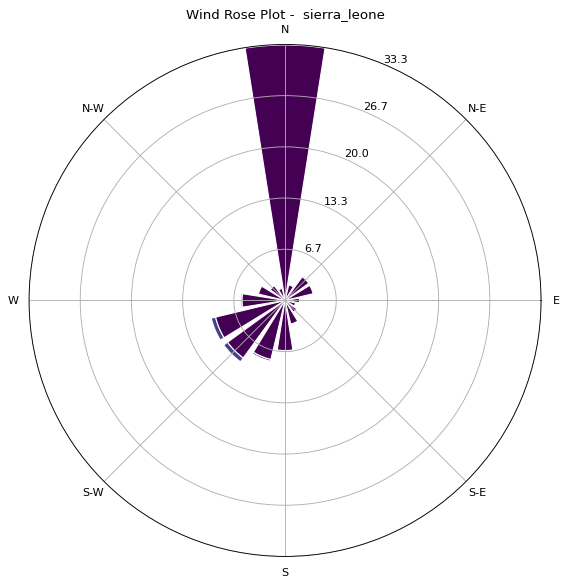

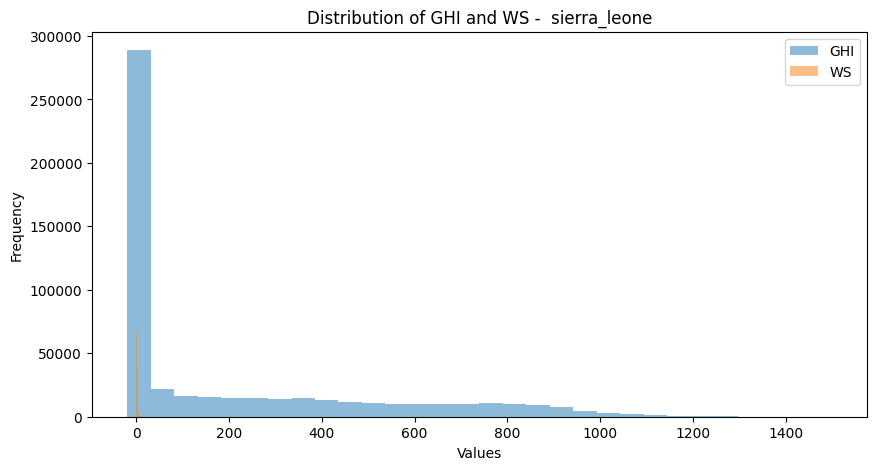

In [9]:
# Wind rose plot
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
plt.title(f'Wind Rose Plot -  sierra_leone')
plt.show()

# Histograms
plt.figure(figsize=(10, 5))
plt.hist(df['GHI'], bins=30, alpha=0.5, label='GHI')
plt.hist(df['WS'], bins=30, alpha=0.5, label='WS')
plt.legend()
plt.title(f'Distribution of GHI and WS -  sierra_leone')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

## Temperature Analysis

In [10]:
# RH vs Tamb scatter plot (already included above, but add observations)
print("Observations on RH vs Tamb and GHI:")
print("- High RH may correlate with lower Tamb or GHI due to cloud cover.")

Observations on RH vs Tamb and GHI:
- High RH may correlate with lower Tamb or GHI due to cloud cover.


## Bubble Chart


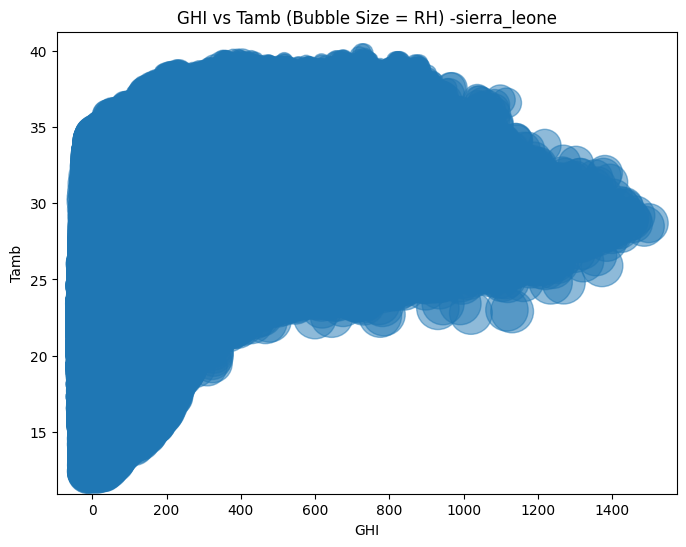

In [13]:
# GHI vs Tamb with bubble size = RH
plt.figure(figsize=(8, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title(f'GHI vs Tamb (Bubble Size = RH) -sierra_leone')
plt.show()